<a href="https://colab.research.google.com/github/MohammadNoumanAwan/Sentiment-Analysis-Model/blob/main/SVM-and-LR_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries & DataSet

In [5]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pickle
import tkinter as tk
from tkinter import messagebox

# Load Dataset

In [6]:
df = pd.read_csv('capitals_dataset_Final_Corpus_FINAL (1).csv')

# DISPLAY DATASET

In [7]:
df.head()

,Capitals Text Generation,Sentiment Label,Predicted Capital,User-Id,Social-Accounts,Date,Time,Day,Country,Age-Of-User
0,"💸 Financial growth is not good,",Negative,Economic Capital,3208,LinkedIn,2024-03-24,08:39:41,Sunday,Germany,23
1,"🖌️ Morgan’s designs were not good, even with g...",Negative,Creative Capital,2597,Flickr,2024-05-30,08:39:42,Thursday,France,16
2,🔄 He repeats bad failures. 🔄,Negative,Human Leadership Capital,7841,Instagram,2024-02-27,08:39:36,Tuesday,Sweden,15
3,😠 Poor emotional handling led to not good team...,Negative,Emotional Capital,8860,Baidu Tieba,2024-05-18,08:39:38,Saturday,Philippines,16
4,🎓 Years of practical work built my confidence!,Positive,Experiential Capital,8392,TikTok,2024-02-22,08:39:41,Thursday,Thailand,42


In [8]:
df.tail()

,Capitals Text Generation,Sentiment Label,Predicted Capital,User-Id,Social-Accounts,Date,Time,Day,Country,Age-Of-User
336024,🌟 Faith is not bad for providing strength and ...,Positive,Religious Capital,7677,Tumblr,2023-12-25,08:39:37,Monday,Iran,18
336025,😟 A damaged reputation hindered their competit...,Negative,Reputational Capital,4455,Instagram,2023-12-26,08:39:42,Tuesday,Italy,23
336026,😔 Negative interactions cause disruption in gr...,Negative,Social Capital,9732,Twitter,2023-11-06,08:39:37,Monday,Sweden,27
336027,"🤝 The community didn't lack strong support, cr...",Positive,Social Capital,4801,Periscope,2023-12-09,08:39:37,Saturday,Canada,20
336028,🔋 The solar-powered devices contributed to sus...,Positive,Physical Capital,1056,YouTube,2024-08-04,08:39:40,Sunday,Egypt,29


# Data Set Shape

In [9]:
df.shape

(336029, 10)

# CHECKING DTYPES

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336029 entries, 0 to 336028
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Capitals Text Generation  336029 non-null  object
 1   Sentiment Label           336029 non-null  object
 2   Predicted Capital         336029 non-null  object
 3   User-Id                   336029 non-null  int64 
 4   Social-Accounts           336029 non-null  object
 5   Date                      336029 non-null  object
 6   Time                      336029 non-null  object
 7   Day                       336029 non-null  object
 8   Country                   336029 non-null  object
 9   Age-Of-User               336029 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 25.6+ MB


# Summary Statistics

In [11]:
df.describe()

,User-Id,Age-Of-User
count,336029.000000,336029.000000
mean,5500.486863,34.939966
std,2600.973136,17.071688
min,1000.000000,13.000000
25%,3244.000000,19.000000
50%,5501.000000,32.000000
75%,7760.000000,47.000000
max,9999.000000,75.000000


# Step 1: Data Preprocessing


# Define function to remove emojis and unnecessary characters

In [12]:
def remove_unnecessary_characters(text):
    text = re.sub(r'<.*?>', '', str(text))
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))
    text = re.sub(r'\s+', ' ', str(text)).strip()
    return text


In [13]:
df['Clean_Capitals Text Generation'] = df['Capitals Text Generation'].apply(remove_unnecessary_characters)

# Display the first few rows to check the cleaning

In [14]:
df.head()

,Capitals Text Generation,Sentiment Label,Predicted Capital,User-Id,Social-Accounts,Date,Time,Day,Country,Age-Of-User,Clean_Capitals Text Generation
0,"💸 Financial growth is not good,",Negative,Economic Capital,3208,LinkedIn,2024-03-24,08:39:41,Sunday,Germany,23,Financial growth is not good
1,"🖌️ Morgan’s designs were not good, even with g...",Negative,Creative Capital,2597,Flickr,2024-05-30,08:39:42,Thursday,France,16,Morgans designs were not good even with good f...
2,🔄 He repeats bad failures. 🔄,Negative,Human Leadership Capital,7841,Instagram,2024-02-27,08:39:36,Tuesday,Sweden,15,He repeats bad failures
3,😠 Poor emotional handling led to not good team...,Negative,Emotional Capital,8860,Baidu Tieba,2024-05-18,08:39:38,Saturday,Philippines,16,Poor emotional handling led to not good team d...
4,🎓 Years of practical work built my confidence!,Positive,Experiential Capital,8392,TikTok,2024-02-22,08:39:41,Thursday,Thailand,42,Years of practical work built my confidence


# TOKENIZATION

In [15]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [16]:
# Ensure the necessary NLTK data is downloaded
nltk.download('punkt')

# Define the function to tokenize text
def tokenize_text(text):
    try:
        # Convert the input to string format
        text = str(text)
        # Tokenize the text
        tokens = word_tokenize(text)
        return tokens
    except Exception as e:
        # Print any errors encountered during tokenization
        print(f"Error tokenizing text: {e}")
        return []

# Apply the function to the 'Clean_Capitals Text Generation' column of the DataFrame
df['Tokens'] = df['Clean_Capitals Text Generation'].apply(tokenize_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
df.head()

,Capitals Text Generation,Sentiment Label,Predicted Capital,User-Id,Social-Accounts,Date,Time,Day,Country,Age-Of-User,Clean_Capitals Text Generation,Tokens
0,"💸 Financial growth is not good,",Negative,Economic Capital,3208,LinkedIn,2024-03-24,08:39:41,Sunday,Germany,23,Financial growth is not good,"[Financial, growth, is, not, good]"
1,"🖌️ Morgan’s designs were not good, even with g...",Negative,Creative Capital,2597,Flickr,2024-05-30,08:39:42,Thursday,France,16,Morgans designs were not good even with good f...,"[Morgans, designs, were, not, good, even, with..."
2,🔄 He repeats bad failures. 🔄,Negative,Human Leadership Capital,7841,Instagram,2024-02-27,08:39:36,Tuesday,Sweden,15,He repeats bad failures,"[He, repeats, bad, failures]"
3,😠 Poor emotional handling led to not good team...,Negative,Emotional Capital,8860,Baidu Tieba,2024-05-18,08:39:38,Saturday,Philippines,16,Poor emotional handling led to not good team d...,"[Poor, emotional, handling, led, to, not, good..."
4,🎓 Years of practical work built my confidence!,Positive,Experiential Capital,8392,TikTok,2024-02-22,08:39:41,Thursday,Thailand,42,Years of practical work built my confidence,"[Years, of, practical, work, built, my, confid..."


# Data Normalization

In [18]:
def normalize_text(text):
    if isinstance(text, str):
        text = text.lower()  # Convert text to lowercase
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    else:
        text = str(text)  # Convert non-string inputs to string
    return text

# Apply normalize_text function to the 'clean_Capitals Text Generation' column
df['Normalized_text'] = df['Clean_Capitals Text Generation'].apply(normalize_text)

In [19]:
df.head()

,Capitals Text Generation,Sentiment Label,Predicted Capital,User-Id,Social-Accounts,Date,Time,Day,Country,Age-Of-User,Clean_Capitals Text Generation,Tokens,Normalized_text
0,"💸 Financial growth is not good,",Negative,Economic Capital,3208,LinkedIn,2024-03-24,08:39:41,Sunday,Germany,23,Financial growth is not good,"[Financial, growth, is, not, good]",financial growth is not good
1,"🖌️ Morgan’s designs were not good, even with g...",Negative,Creative Capital,2597,Flickr,2024-05-30,08:39:42,Thursday,France,16,Morgans designs were not good even with good f...,"[Morgans, designs, were, not, good, even, with...",morgans designs were not good even with good f...
2,🔄 He repeats bad failures. 🔄,Negative,Human Leadership Capital,7841,Instagram,2024-02-27,08:39:36,Tuesday,Sweden,15,He repeats bad failures,"[He, repeats, bad, failures]",he repeats bad failures
3,😠 Poor emotional handling led to not good team...,Negative,Emotional Capital,8860,Baidu Tieba,2024-05-18,08:39:38,Saturday,Philippines,16,Poor emotional handling led to not good team d...,"[Poor, emotional, handling, led, to, not, good...",poor emotional handling led to not good team d...
4,🎓 Years of practical work built my confidence!,Positive,Experiential Capital,8392,TikTok,2024-02-22,08:39:41,Thursday,Thailand,42,Years of practical work built my confidence,"[Years, of, practical, work, built, my, confid...",years of practical work built my confidence


# Removing Stopwords

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
stop_words = set(stopwords.words('english'))
df['Text_without_stopwords'] = df['Tokens'].apply(lambda tokens: ' '.join([word for word in tokens if word.lower() not in stop_words]))

In [ ]:
# Display a few examples of the cleaned text
print(df[['Text_without_stopwords']].head())

                             Text_without_stopwords
0                             Financial growth good
1  Morgans designs good even good feedback received
2                              repeats bad failures
3    Poor emotional handling led good team dynamics
4             Years practical work built confidence


# Split the dataset

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df['Text_without_stopwords']
y = df[['Predicted Capital', 'Sentiment Label']]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Feature Extraction

# Creating TF-IDF
Use TF-IDF to convert text data into numerical features:Term Frequency-Inverse Document Frequency

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer_SVM_LR_withoutGS = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer_SVM_LR_withoutGS.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer_SVM_LR_withoutGS.transform(X_test)

# Encode Capital and Sentiment labels

In [27]:
label_encoder_capital_SVM_LR_withoutGS = LabelEncoder()
label_encoder_sentiment_SVM_LR_withoutGS = LabelEncoder()
y_train['Capital'] = label_encoder_capital_SVM_LR_withoutGS.fit_transform(y_train['Predicted Capital'])
y_test['Capital'] = label_encoder_capital_SVM_LR_withoutGS.transform(y_test['Predicted Capital'])
y_train['Sentiment Label'] = label_encoder_sentiment_SVM_LR_withoutGS.fit_transform(y_train['Sentiment Label'])
y_test['Sentiment Label'] = label_encoder_sentiment_SVM_LR_withoutGS.transform(y_test['Sentiment Label'])

In [28]:
y_test['Sentiment Label']

,Sentiment Label
34123,0
164971,1
101665,0
153996,1
17695,0
...,...
41297,0
239444,0
35393,1
10354,0


In [29]:
y_train['Sentiment Label'].head()

,Sentiment Label
248000,1
315647,0
252663,0
275401,0
146065,1


In [30]:
y_train['Capital'].head()

,Capital
248000,15
315647,6
252663,8
275401,5
146065,15


In [31]:
y_test['Capital']

,Capital
34123,11
164971,8
101665,11
153996,6
17695,7
...,...
41297,14
239444,4
35393,2
10354,1


# Model for Sentiment Prediction

In [ ]:
sentiment_model_LR_withoutGS = LogisticRegression(max_iter=1000)
sentiment_model_LR_withoutGS.fit(X_train_tfidf, y_train['Sentiment Label'])

# Predict on the test set for Sentiment Prediction

In [ ]:
y_test_sentiment_pred = sentiment_model_LR_withoutGS.predict(X_test_tfidf)

# Evaluate and print metrics for Sentiment Prediction

In [ ]:
print_evaluation_metrics(y_test['Sentiment Label'], y_test_sentiment_pred, "Sentiment Prediction")

--- Sentiment Prediction ---
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     32359
           1       0.97      0.97      0.97     34847

    accuracy                           0.97     67206
   macro avg       0.97      0.97      0.97     67206
weighted avg       0.97      0.97      0.97     67206



# Plot Confusion Matrix for Sentiment Prediction

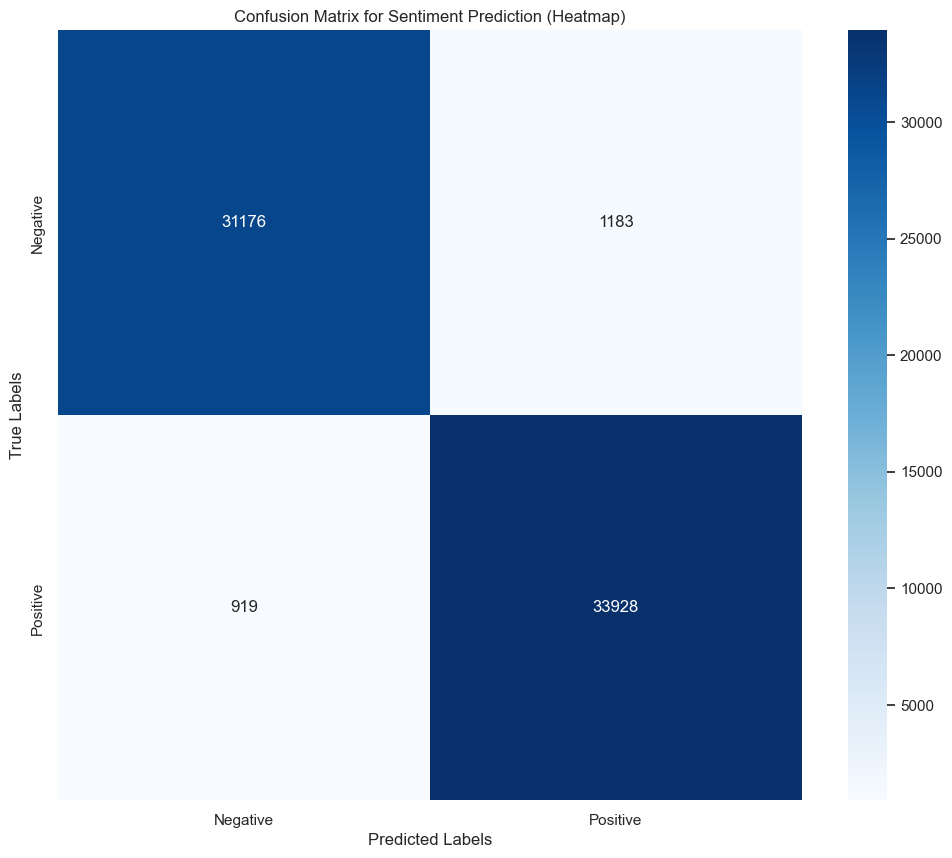

In [ ]:
sentiment_labels = label_encoder_sentiment_SVM_LR_withoutGS.classes_
plot_confusion_matrix_heatmap(y_test['Sentiment Label'], y_test_sentiment_pred, "Confusion Matrix for Sentiment Prediction (Heatmap)", labels=sentiment_labels)

# Visualization of Accuracy, Precision, Recall, and F1-Score for Sentiment Prediction

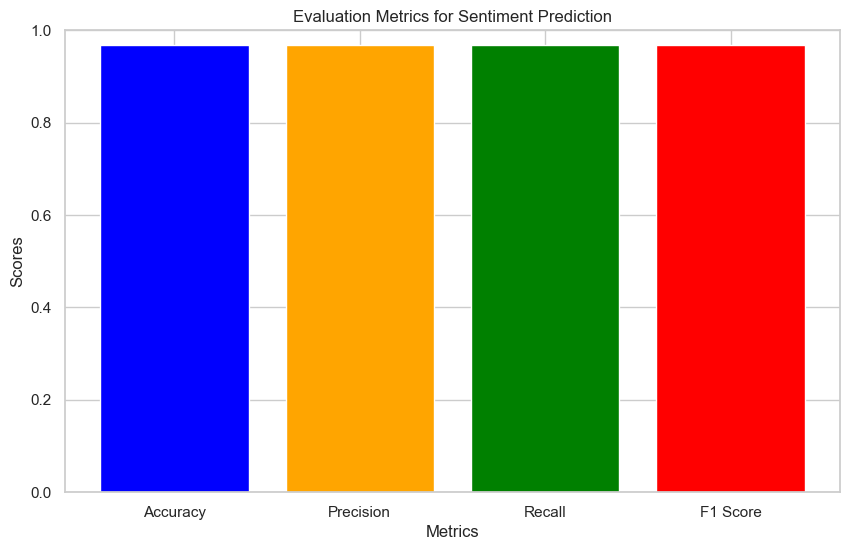

In [ ]:
plot_metrics_bar_chart(y_test['Sentiment Label'], y_test_sentiment_pred, "Evaluation Metrics for Sentiment Prediction")

# Save the trained models and vectorizer

In [ ]:
# Save models, vectorizer, and label encoders
with open('capital_model_SVM_withoutGS.pkl', 'wb') as f:
    pickle.dump(capital_model_SVM_withoutGS, f)

with open('sentiment_model_LR_withoutGS.pkl', 'wb') as f:
    pickle.dump(sentiment_model_LR_withoutGS, f)

with open('tfidf_vectorizer_SVM_LR_withoutGS.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer_SVM_LR_withoutGS, f)

with open('label_encoder_capital_SVM_LR_withoutGS.pkl', 'wb') as f:
    pickle.dump(label_encoder_capital_SVM_LR_withoutGS, f)

with open('label_encoder_sentiment_SVM_LR_withoutGS.pkl', 'wb') as f:
    pickle.dump(label_encoder_sentiment_SVM_LR_withoutGS, f)

# Evaluate Sentiment Prediction Model

# Step 4: Prediction Pipeline
Create a pipeline to first predict the capital and then predict the sentiment:

In [ ]:
def predict_pipeline(text):
    clean_text = remove_unnecessary_characters(text)
    tokens = tokenize_text(clean_text)
    text_without_stopwords = ' '.join([word for word in tokens if word.lower() not in stop_words])
    text_tfidf = tfidf_vectorizer_SVM_LR_withoutGS.transform([text_without_stopwords])

    capital_prediction_encoded = capital_model_SVM_withoutGS.predict(text_tfidf)
    sentiment_prediction_encoded = sentiment_model_LR_withoutGS.predict(text_tfidf)

    capital_prediction = label_encoder_capital_SVM_LR_withoutGS.inverse_transform(capital_prediction_encoded)[0]
    sentiment_prediction = label_encoder_sentiment_SVM_LR_withoutGS.inverse_transform(sentiment_prediction_encoded)[0]

    return capital_prediction, sentiment_prediction

# Test the pipeline

In [ ]:
test_sentence = "Leaders' focus on achieving excellence motivated the team to perform their best. This is a core aspect of quality leadership. 🔝"
capital, sentiment = predict_pipeline(test_sentence)
print(f"Predicted Capital: {capital}, Predicted Sentiment: {sentiment}")

Predicted Capital: Human Leadership Capital, Predicted Sentiment: Positive


# Function to predict capital and sentiment

In [ ]:
import tkinter as tk
from tkinter import messagebox, font

In [ ]:

def predict():
    text = entry.get()
    if not text:
        messagebox.showwarning("Input Error", "Please enter a sentence.")
        return
    predicted_capital, predicted_sentiment = predict_pipeline(text)

    result_text = f"Predicted Capital: {predicted_capital}\nPredicted Sentiment: {predicted_sentiment}"
    result_window = tk.Toplevel(root)
    result_window.title("Prediction Result")

    result_label = tk.Label(result_window, text=result_text, font=("Helvetica", 14), padx=20, pady=20)
    result_label.pack()

    close_button = tk.Button(result_window, text="Close", command=result_window.destroy, font=("Helvetica", 12), padx=10, pady=5)
    close_button.pack(pady=10)

# Set up the GUI

In [ ]:
root = tk.Tk()
root.title("Capital and Sentiment Prediction")
# Set window size and position
root.geometry("500x250+300+200")

label = tk.Label(root, text="Enter a sentence:", font=("Helvetica", 14))
label.pack(pady=20)


entry = tk.Entry(root, width=50, font=("Helvetica", 12))
entry.pack(pady=10)

predict_button = tk.Button(root, text="Predict", command=predict, font=("Helvetica", 12), padx=10, pady=5)
predict_button.pack(pady=20)

root.mainloop()

# Thank You!